Dataset characteristics
=========================================	
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv
	
	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

get_ipython().run_line_magic('pylab', 'inline')
pylab.rcParams['figure.figsize'] = (15, 5)

Populating the interactive namespace from numpy and matplotlib


In [115]:
data = pd.read_csv("data/day_coded.csv")

Muchos de los datos ya se encuentran normalizados (continuos) y expresados numéricamente (categoricos)

# Attrs

In [116]:
data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,primavera,2011,Enero,no,Sat,no,nublado,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,primavera,2011,Enero,no,Dom,no,nublado,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,primavera,2011,Enero,no,Lun,si,despejado,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,primavera,2011,Enero,no,Mar,si,despejado,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,primavera,2011,Enero,no,Mier,si,despejado,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,primavera,2011,Enero,no,Jue,si,despejado,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,primavera,2011,Enero,no,Vie,si,nublado,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,primavera,2011,Enero,no,Sat,no,nublado,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,primavera,2011,Enero,no,Dom,no,despejado,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,primavera,2011,Enero,no,Lun,si,despejado,0.150833,0.150888,0.482917,0.223267,41,1280,1321


## season

In [117]:
seasons = data.season
season_freq = np.unique(seasons,return_counts=True)

In [118]:
counts_by_season = data.groupby(data.season).cnt.apply(lambda x: np.array(x)).rename(season_map)

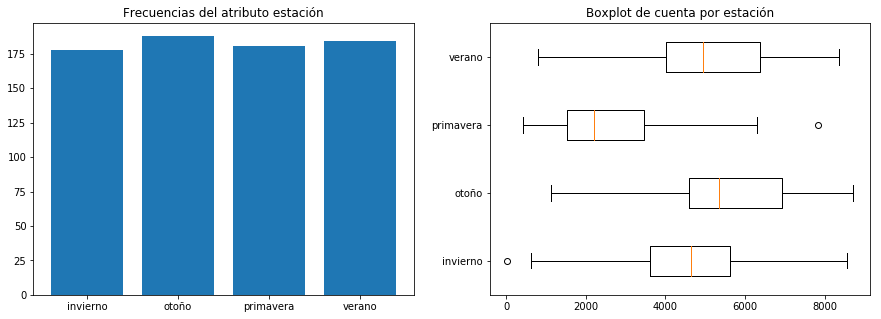

In [119]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.bar(season_freq[0],season_freq[1])
ax1.set_title("Frecuencias del atributo estación")
ax2.boxplot(counts_by_season,labels=counts_by_season.index,vert=False)
ax2.set_title("Boxplot de cuenta por estación")
plt.show()

## year

In [120]:
years = data.yr
years_freq = np.unique(years,return_counts=True)

In [121]:
counts_by_year = data.groupby(data.yr).cnt.apply(lambda x: np.array(x)).rename(year_map)

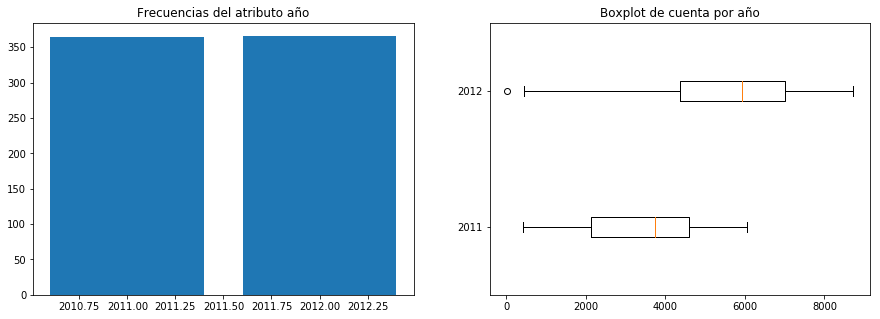

In [123]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.bar(years_freq[0],years_freq[1])
ax1.set_title("Frecuencias del atributo año")
ax2.boxplot(counts_by_year,labels=counts_by_year.index, vert=False)
ax2.set_title("Boxplot de cuenta por año")
plt.show()

## mnth

In [125]:
months = data.mnth
months_freq = np.unique(months,return_counts=True)

In [126]:
counts_by_month = data.groupby(data.mnth).cnt.apply(lambda x: np.array(x)).rename(mnth_map)

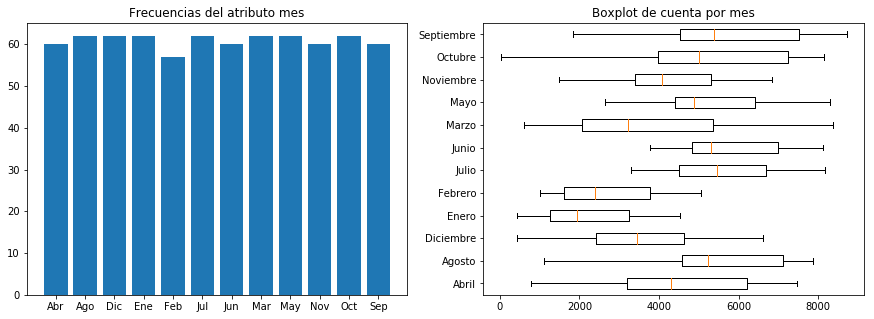

In [127]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.bar(np.array(list(map(lambda x: x[0:3], months_freq[0]))),months_freq[1])
ax1.set_title("Frecuencias del atributo mes")
ax2.boxplot(counts_by_month,labels=counts_by_month.index, vert=False)
ax2.set_title("Boxplot de cuenta por mes")
plt.show()

## holiday

In [128]:
holiday_freq = np.unique(data.holiday,return_counts=True)

In [130]:
counts_by_holiday = data.groupby(data.holiday).cnt.apply(lambda x: np.array(x))

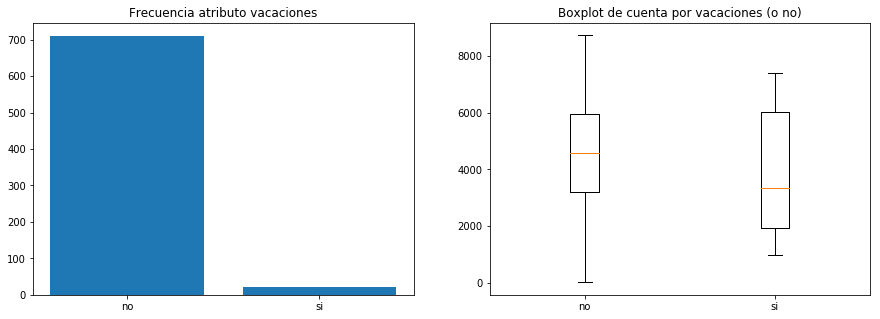

In [131]:
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.bar(holiday_freq[0],holiday_freq[1])
ax1.set_title("Frecuencia atributo vacaciones")
ax2.boxplot(counts_by_holiday, vert=True, labels=counts_by_holiday.index)
ax2.set_title("Boxplot de cuenta por vacaciones (o no)")
plt.show()

## workingday

In [133]:
wd_freq = np.unique(data.workingday,return_counts=True)

In [134]:
counts_by_wd = data.groupby(data.workingday).cnt.apply(lambda x: np.array(x))

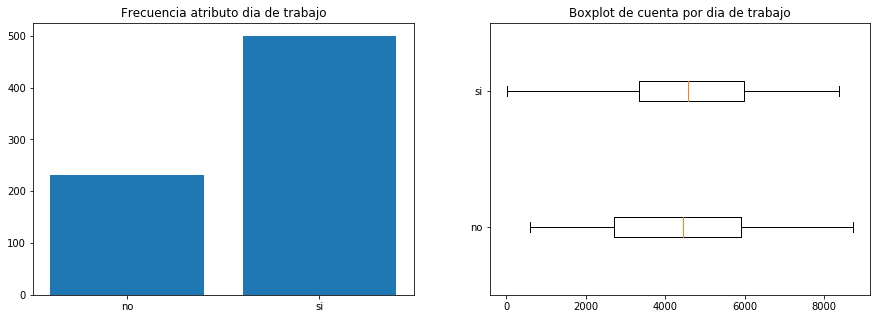

In [135]:
pylab.rcParams['figure.figsize'] = (15, 5)
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.bar(wd_freq[0],wd_freq[1])
ax1.set_title("Frecuencia atributo dia de trabajo")
ax2.boxplot(counts_by_wd,labels=counts_by_wd.index, vert=False)
ax2.set_title("Boxplot de cuenta por dia de trabajo")
plt.show()

## weekday

In [136]:
wkd_freq = np.unique(data.weekday,return_counts=True)

In [137]:
counts_by_wkd = data.groupby(data.weekday).cnt.apply(lambda x: np.array(x))

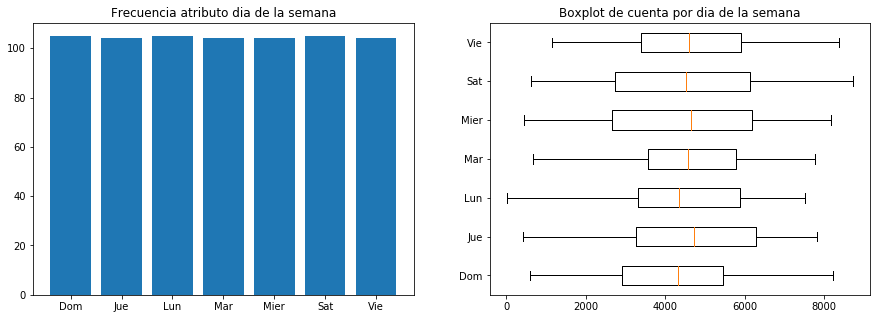

In [138]:
pylab.rcParams['figure.figsize'] = (15, 5)
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.bar(wkd_freq[0],wkd_freq[1])
ax1.set_title("Frecuencia atributo dia de la semana")
ax2.boxplot(counts_by_wkd,labels=counts_by_wkd.index, vert=False)
ax2.set_title("Boxplot de cuenta por dia de la semana")
plt.show()

## weather

In [139]:
wth_freq = np.unique(data.weathersit,return_counts=True)
counts_by_wth = data.groupby(data.weathersit).cnt.apply(lambda x: np.array(x))

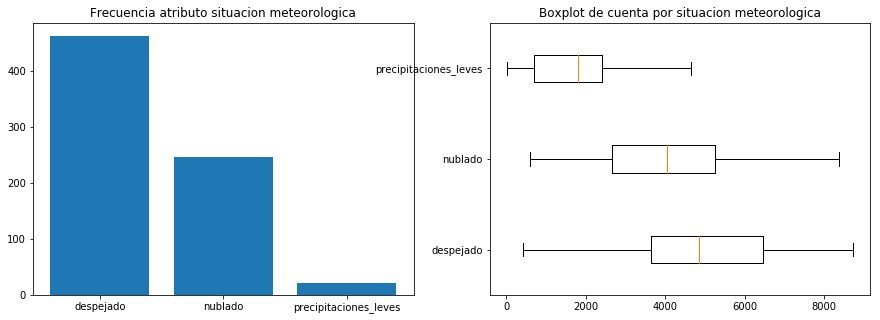

In [140]:
pylab.rcParams['figure.figsize'] = (15, 5)
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.bar(wth_freq[0],wth_freq[1])
ax1.set_title("Frecuencia atributo situacion meteorologica")
ax2.boxplot(counts_by_wth,labels=counts_by_wth.index, vert=False)
ax2.set_title("Boxplot de cuenta por situacion meteorologica")
plt.show()

## temp

In [141]:
temp_deg = data.temp.apply(lambda x: x*41)

In [142]:
print('Media: %f Desv. Tipica: %f Rango: [%f %f]' % (temp_deg.mean(),temp_deg.std(),temp_deg.min(),temp_deg.max()))

Media: 20.310776 Desv. Tipica: 7.505091 Rango: [2.424346 35.328347]


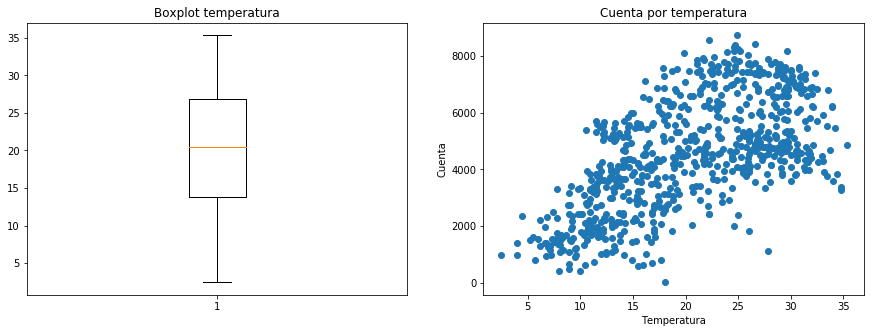

In [143]:
pylab.rcParams['figure.figsize'] = (15, 5)
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.boxplot(temp_deg)
ax1.set_title("Boxplot temperatura")
ax2.plot(temp_deg,data.cnt, 'o')
ax2.set_xlabel("Temperatura")
ax2.set_ylabel("Cuenta")
ax2.set_title("Cuenta por temperatura")
plt.show()

## atemp

In [144]:
atemp_deg = data.atemp.apply(lambda x: x*50)

In [145]:
print('Media: %f Desv. Tipica: %f Rango: [%f %f]' % (atemp_deg.mean(),atemp_deg.std(),atemp_deg.min(),atemp_deg.max()))

Media: 23.717699 Desv. Tipica: 8.148059 Rango: [3.953480 42.044800]


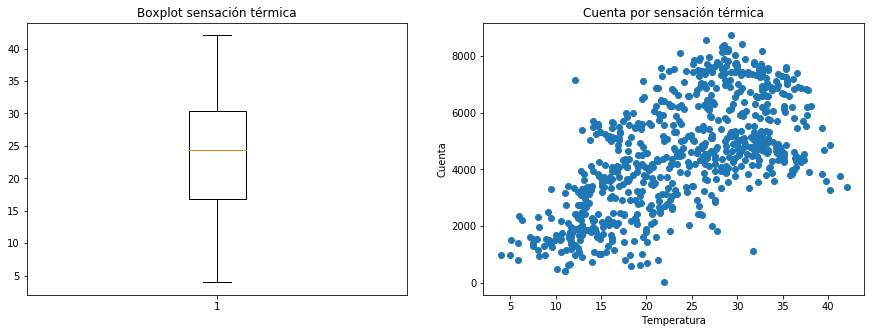

In [146]:
pylab.rcParams['figure.figsize'] = (15, 5)
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.boxplot(atemp_deg)
ax1.set_title("Boxplot sensación térmica")
ax2.plot(atemp_deg,data.cnt, 'o')
ax2.set_xlabel("Temperatura")
ax2.set_ylabel("Cuenta")
ax2.set_title("Cuenta por sensación térmica")
plt.show()

Text(0,0.5,'Sensación térmica')

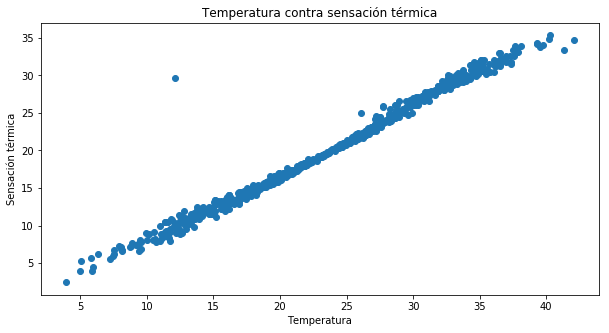

In [147]:
pylab.rcParams['figure.figsize'] = (10, 5)
plt.scatter(atemp_deg, temp_deg)
plt.title("Temperatura contra sensación térmica")
plt.xlabel("Temperatura")
plt.ylabel("Sensación térmica")

## hum

In [148]:
hum_nor = data.hum.apply(lambda x: x*100)

In [149]:
print('Media: %f Desv. Tipica: %f Rango: [%f %f]' % (hum_nor.mean(),hum_nor.std(),hum_nor.min(),hum_nor.max()))

Media: 62.789406 Desv. Tipica: 14.242910 Rango: [0.000000 97.250000]


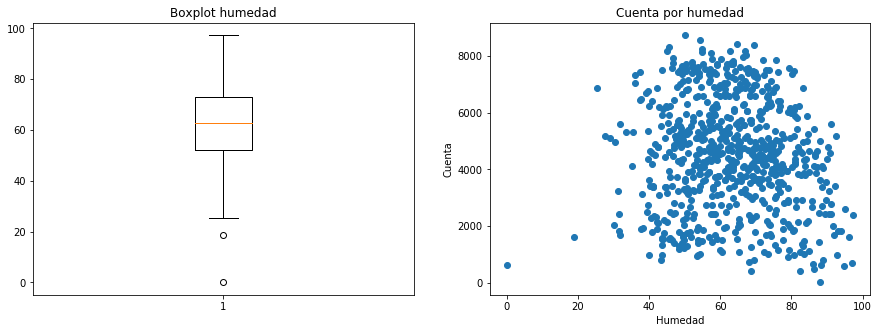

In [150]:
pylab.rcParams['figure.figsize'] = (15, 5)
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.boxplot(hum_nor)
ax1.set_title("Boxplot humedad")
ax2.plot(hum_nor,data.cnt, 'o')
ax2.set_xlabel("Humedad")
ax2.set_ylabel("Cuenta")
ax2.set_title("Cuenta por humedad")
plt.show()

## windspeed

In [151]:
wnd_nor = data.windspeed.apply(lambda x: x*67)

In [152]:
print('Media: %f Desv. Tipica: %f Rango: [%f %f]' % (wnd_nor.mean(),wnd_nor.std(),wnd_nor.min(),wnd_nor.max()))

Media: 12.762576 Desv. Tipica: 5.192357 Rango: [1.500244 34.000021]


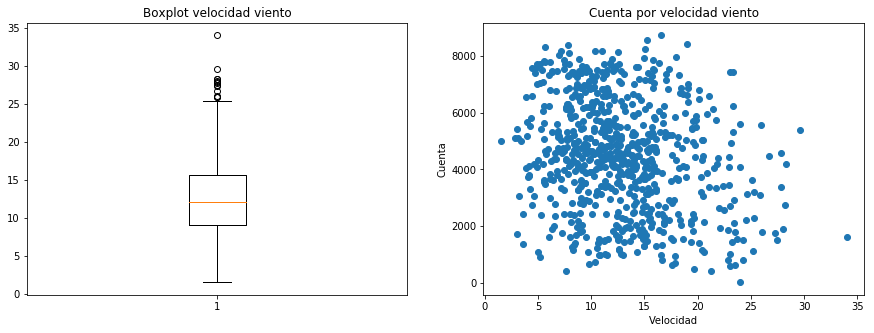

In [153]:
pylab.rcParams['figure.figsize'] = (15, 5)
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.boxplot(wnd_nor)
ax1.set_title("Boxplot velocidad viento")
ax2.plot(wnd_nor,data.cnt, 'o')
ax2.set_xlabel("Velocidad")
ax2.set_ylabel("Cuenta")
ax2.set_title("Cuenta por velocidad viento")
plt.show()

## count

In [154]:
print('Media: %f Desv. Tipica: %f Rango: [%f %f]' % (data.cnt.mean(),data.cnt.std(),data.cnt.min(),data.cnt.max()))

Media: 4504.348837 Desv. Tipica: 1937.211452 Rango: [22.000000 8714.000000]


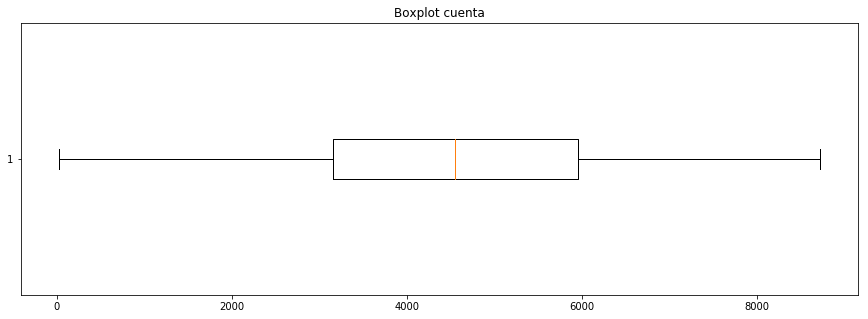

In [155]:
pylab.rcParams['figure.figsize'] = (15, 5)
fig, (ax1) = plt.subplots(1,1)
ax1.boxplot(data.cnt,vert=False)
ax1.set_title("Boxplot cuenta")
plt.show()

## Interacciones

### hum*windspeed

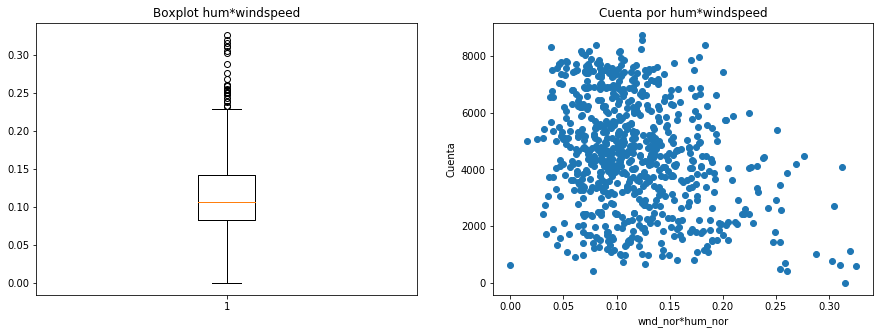

In [156]:
pylab.rcParams['figure.figsize'] = (15, 5)
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.boxplot(data.windspeed*data.hum)
ax1.set_title("Boxplot hum*windspeed")
ax2.plot(data.windspeed*data.hum,data.cnt, 'o')
ax2.set_xlabel("wnd_nor*hum_nor")
ax2.set_ylabel("Cuenta")
ax2.set_title("Cuenta por hum*windspeed")
plt.show()

### hum\*wndspeed\*atemp

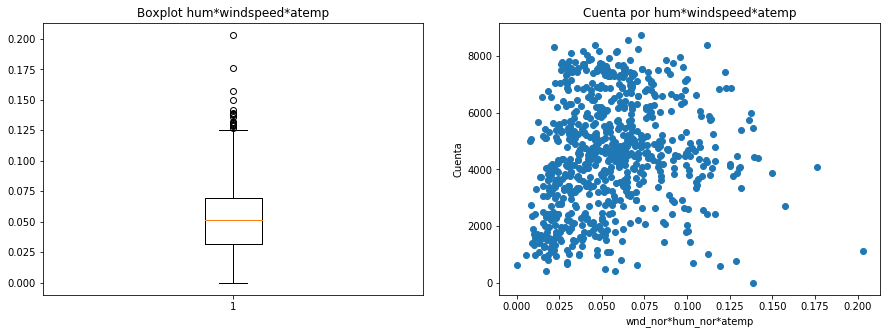

In [157]:
pylab.rcParams['figure.figsize'] = (15, 5)
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.boxplot(data.windspeed*data.hum*data.atemp)
ax1.set_title("Boxplot hum*windspeed*atemp")
ax2.plot(data.windspeed*data.hum*data.atemp,data.cnt, 'o')
ax2.set_xlabel("wnd_nor*hum_nor*atemp")
ax2.set_ylabel("Cuenta")
ax2.set_title("Cuenta por hum*windspeed*atemp")
plt.show()